<a href="https://colab.research.google.com/github/francianerod/PROJETOS-Empresas/blob/main/AA_ETL_powerbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tratamento de Dados e Painel Interativo**

Analista responsável: Franciane Rodrigues

Empresa: AA Data Science - Nova York/EUA

Área/Setor: Analytics

Obs.: Código usado para realizar ETL e realização de um dashboard em Power BI

### **Abertura de Bibliotecas**

In [ ]:
# Abertura de biblioteca
import pandas as pd

In [ ]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns',100)

### **Google Drive**

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extração por Google Drive
df = pd.read_csv('/content/drive/MyDrive/AA Data Science/AA - Overnight Dashboard.csv',
                sep=',',
                encoding='ISO-8859-1',
                )

### **Pré-Análise**

In [ ]:
df.head(5)

,AA - Overnight Dashboard (6459529),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geography,Data Stream,Custom Range,Avg Level,Viewing Source,Program,Daypart,Dates,Characteristic,Demo,Metrics,RTG % (X.XXX),SHR % (X.X),HUT/PUT % (X.X),SOW,IMP,#TC,Days of WK,Dur (QH),HUT/PUT IMP,Intab,Start Time,End Time,Indicator
2,Orlando-Daytona Bch-Melbrn,Live+Same Day,Custom Range 1,Daily,WFTV-TV 9.1,ABC-NITELINE,M-F 12a-1a,08/07/2023,TV Households,P25-54,NaN,0.028,0.5,5.5,"1,661,482",466,1,M......,2,"91,274","1,133",12:30 AM,1:00 AM,NaN
3,Orlando-Daytona Bch-Melbrn,Live+Same Day,Custom Range 1,Daily,WFTV-TV 9.1,ABC-NITELINE,M-F 12a-1a,08/07/2023,TV Households,M25-54,NaN,0.057,1.3,4.3,"815,581",466,1,M......,2,"34,994",548,12:30 AM,1:00 AM,NaN
4,Orlando-Daytona Bch-Melbrn,Live+Same Day,Custom Range 1,Daily,WFTV-TV 9.1,ABC-NITELINE,M-F 12a-1a,08/07/2023,TV Households,F25-54,NaN,0,0,6.7,"845,900",0,1,M......,2,"56,280",585,12:30 AM,1:00 AM,NaN


In [ ]:
# Renomeando colunas
df.rename(columns={'AA - Overnight Dashboard (6459529)':'Geography',
                   'Unnamed: 1':'Data Stream',
                   'Unnamed: 2':'Custom Range',
                   'Unnamed: 3':'Avg Level',
                   'Unnamed: 4':'Viewing_Source',
                   'Unnamed: 5':'Program',
                   'Unnamed: 6':'Daypart',
                   'Unnamed: 7':'Dates',
                   'Unnamed: 8':'Characteristic',
                   'Unnamed: 9':'Demo',
                   'Unnamed: 10':'Metrics',
                   'Unnamed: 11':'RTG % (X.XXX)',
                   'Unnamed: 12':'SHR % (X.X)',
                   'Unnamed: 13':'HUT/PUT % (X.X)',
                   'Unnamed: 14':'SOW',
                   'Unnamed: 15':'IMP',
                   'Unnamed: 16':'#TC',
                   'Unnamed: 17':'Days_of_WK',
                   'Unnamed: 18':'Dur (QH)',
                   'Unnamed: 19':'HUT/PUT IMP',
                   'Unnamed: 20':'Intab',
                   'Unnamed: 21':'Start Time',
                   'Unnamed: 22':'End Time',
                   'Unnamed: 23':'Indicator',
                   },inplace=True)


In [ ]:
# Removendo linhas através dos indices
linhas = [0, 1, 3450, 3451]
df = df.drop(linhas)

In [ ]:
# backup - 1
dfback1 = df.copy()

In [ ]:
# Retirada das colunas
df.drop(['Geography',
         'Data Stream',
         'Custom Range',
         'Avg Level',
         'Characteristic',
         'Metrics',
         'RTG % (X.XXX)',
         'SOW',
         '#TC',
         'Intab',
         'Indicator'
        ],axis=1, inplace=True)

In [ ]:
# Trocar um valor especifico na coluna (Viewing_Source)
df.loc[df.Viewing_Source == 'WESH 2.1',  ['Viewing_Source']] = 'WESH'
df.loc[df.Viewing_Source == 'WFTV-TV 9.1', ['Viewing_Source']] = 'WFTV'
df.loc[df.Viewing_Source == 'WKCF 18.1',  ['Viewing_Source']] = 'WKCF'
df.loc[df.Viewing_Source == 'WKMG-TV 6.1', ['Viewing_Source']] = 'WKMG'
df.loc[df.Viewing_Source == 'WOFL 35.1',  ['Viewing_Source']] = 'WOFL'
df.loc[df.Viewing_Source == 'WRDQ-TV 27.1', ['Viewing_Source']] = 'WRDQ'

# Trocar um valor especifico na coluna (Days_of_WK)
df.loc[df.Days_of_WK == 'M......',  ['Days_of_WK']] = 'Monday'
df.loc[df.Days_of_WK == '.Tu.....', ['Days_of_WK']] = 'Tuesday'

In [ ]:
# Verificação da Tabela resultante
df.sample(5)

,Viewing_Source,Program,Daypart,Dates,Demo,SHR % (X.X),HUT/PUT % (X.X),IMP,Days_of_WK,Dur (QH),HUT/PUT IMP,Start Time,End Time
1220,WKMG,NEIBRHD-EN-CBS,M-F 8p-9p,08/07/2023,F25-54,4.3,13.8,"5,063",Monday,2,"116,579",8:00 PM,8:30 PM
1897,WRDQ,ICRIME-1,M-F 8p-9p,08/08/2023,P18+,1.2,22.4,"9,510",Tuesday,2,"806,467",8:00 PM,8:30 PM
546,WESH,ACCESS DAILY,M-F 3a-4a,08/08/2023,P25-54,0,1.7,0,Tuesday,4,"28,778",3:00 AM,4:00 AM
3041,WKCF,TWO & HALF MEN,M-F 11p-12a,08/08/2023,P18+,0.6,16,"3,679",Tuesday,2,"575,748",11:00 PM,11:30 PM
807,WESH,TOP STORY-NBC,M-F 2a-3a,08/07/2023,F18-49,0,2.3,0,Monday,3,"20,422",2:15 AM,3:00 AM


In [ ]:
# Verificação 1
print(sorted(pd.unique(df['IMP'])))

['0', '1,002', '1,006', '1,009', '1,017', '1,018', '1,024', '1,025', '1,026', '1,031', '1,039', '1,040', '1,044', '1,045', '1,047', '1,048', '1,049', '1,051', '1,057', '1,060', '1,063', '1,071', '1,073', '1,087', '1,088', '1,090', '1,093', '1,094', '1,098', '1,102', '1,103', '1,124', '1,126', '1,128', '1,129', '1,133', '1,140', '1,142', '1,144', '1,145', '1,150', '1,151', '1,153', '1,157', '1,163', '1,170', '1,171', '1,175', '1,180', '1,183', '1,184', '1,187', '1,188', '1,194', '1,209', '1,211', '1,216', '1,217', '1,218', '1,219', '1,230', '1,252', '1,257', '1,259', '1,264', '1,268', '1,269', '1,271', '1,272', '1,274', '1,282', '1,283', '1,286', '1,288', '1,289', '1,291', '1,292', '1,293', '1,294', '1,296', '1,298', '1,300', '1,308', '1,310', '1,313', '1,316', '1,321', '1,323', '1,327', '1,339', '1,344', '1,349', '1,353', '1,354', '1,357', '1,358', '1,359', '1,361', '1,372', '1,376', '1,381', '1,392', '1,393', '1,396', '1,397', '1,401', '1,402', '1,403', '1,406', '1,407', '1,411', '1,4

In [ ]:
# Definir a função de transformação
def transformar_para_numero(valor_str):
    valor_str = valor_str.replace(",", "")
    return int(valor_str)

# Aplicar a função à coluna IMP
df['IMP'] = df['IMP'].apply(transformar_para_numero)

In [ ]:
# Verificação 2
print(sorted(pd.unique(df['IMP'])))

[0, 102, 120, 138, 139, 150, 156, 159, 162, 164, 165, 171, 175, 181, 191, 197, 204, 209, 215, 227, 233, 236, 237, 241, 245, 246, 247, 255, 258, 260, 265, 266, 271, 272, 273, 276, 278, 280, 283, 286, 288, 290, 298, 299, 303, 308, 318, 319, 324, 330, 333, 335, 339, 343, 351, 356, 358, 359, 360, 361, 365, 367, 377, 378, 385, 387, 394, 408, 412, 416, 436, 437, 441, 449, 450, 454, 457, 458, 459, 465, 466, 471, 473, 474, 479, 483, 486, 492, 494, 500, 502, 503, 509, 511, 513, 515, 516, 522, 524, 531, 532, 538, 541, 544, 545, 546, 549, 550, 551, 552, 570, 571, 572, 573, 576, 581, 585, 592, 601, 602, 607, 608, 615, 617, 621, 626, 633, 634, 648, 649, 653, 655, 659, 660, 661, 667, 671, 677, 678, 679, 686, 688, 695, 696, 698, 701, 714, 719, 721, 722, 728, 734, 737, 738, 750, 751, 754, 755, 762, 764, 772, 780, 789, 793, 794, 798, 799, 806, 807, 817, 821, 827, 835, 842, 846, 850, 852, 854, 858, 860, 867, 869, 881, 888, 889, 890, 891, 894, 896, 898, 902, 904, 905, 906, 910, 914, 917, 919, 922, 924, 9

In [ ]:
# Exportação em uma pasta Google Drive
df.to_csv('/content/drive/MyDrive/AA Data Science/AA - Overnight Dashboard_tratado.csv',index=False)

## **Dashboard**

## **Transformação**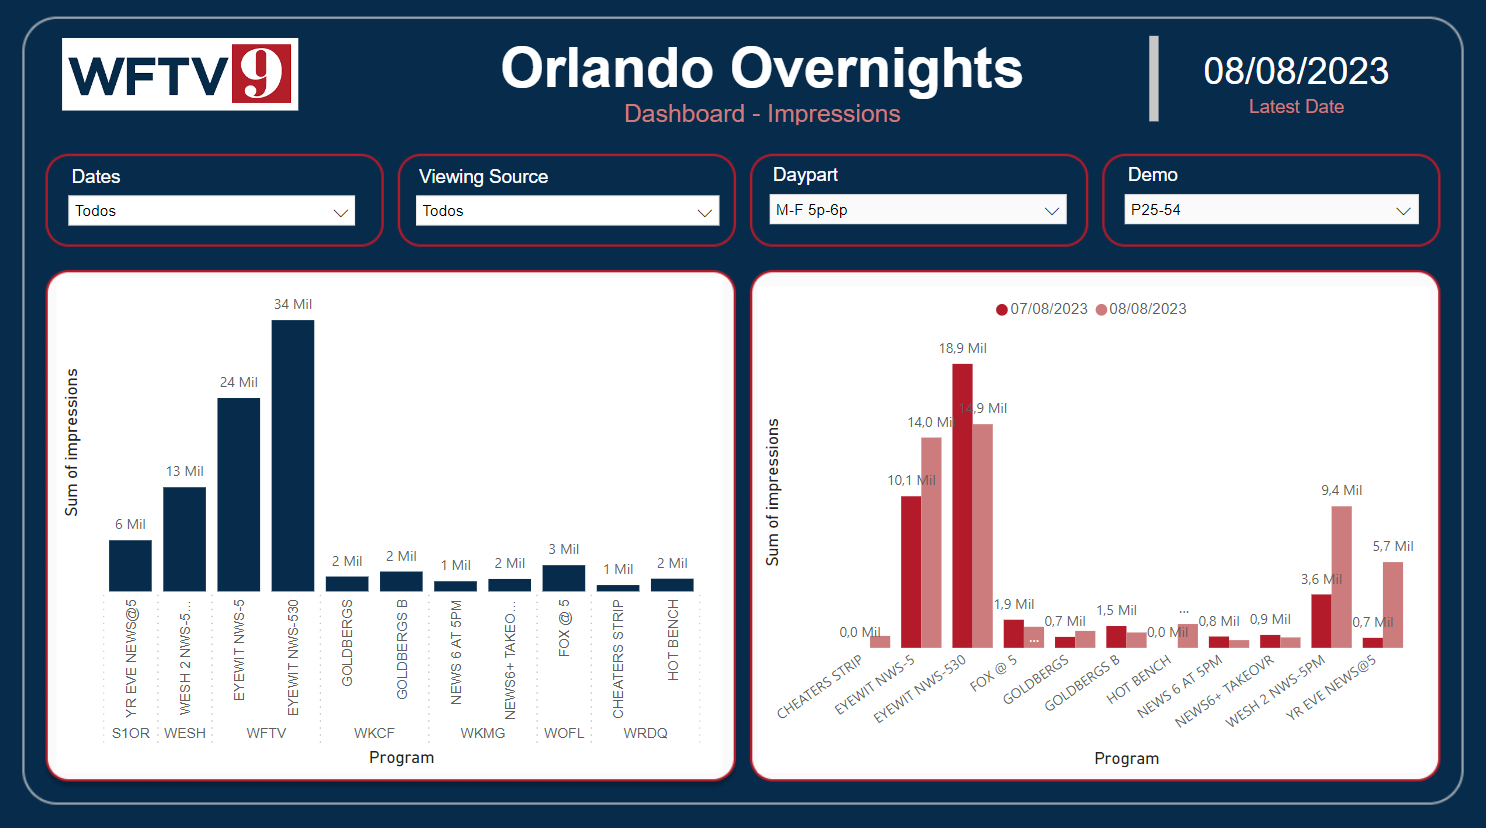

Link: https://app.powerbi.com/view?r=eyJrIjoiMmE2MzljZDItMzQzNy00MmJlLTk0OWUtNTRlYzI4OWMyOWJhIiwidCI6IjQ5M2JlOTFkLTYwYjMtNDg4NC05YzcyLTVhM2UwNDQ2ZTA3MSJ9